<a href="https://colab.research.google.com/github/TianXie1999/Machine-Learning-and-Deep-Learning-in-OR-FE/blob/main/4742_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem 1**

I change the code in *logistic_regreesion_multi_layer.ipynb* to approach the problem. Firstly, I change the layer function into the following to let it perform different activation methods. Then we also need to change the parameter *n_hidden_layer* and the optimizer. We use *RMSPropOptimizer*

We use 50, 80, 100, 50 neurons in 4 hidden layers


In [ ]:
def layer(x, weight_shape, bias_shape, activation_type):
    
    # comes from the study by He et al. for ReLU layers
    w_std = (2.0/weight_shape[0])**0.5
    #print(weight_shape[0])
    #w_std = 0.5;

    #initialization of the weights
    #you can try either
    w_0 = tf.random_normal_initializer(stddev=w_std)
    #w_0 = tf.random_uniform_initializer(minval=-1,maxval=1)

    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    print('Weight Matrix:', W)
    print('Bias Vector:', b)
    
    if activation_type == 'relu':
      return tf.nn.relu(tf.matmul(x, W) + b)
    
    elif activation_type == 'tanh':
      return tf.nn.tanh(tf.matmul(x, W) + b)
    
    elif activation_type == 'leaky':
      return tf.nn.leaky_relu(tf.matmul(x, W) + b)
    
    else:
      return tf.nn.sigmoid(tf.matmul(x, W) + b)

#### **(1)** 
1st layer:  tanh

2nd layer:  sigmoid

3rd layer:  leaky reLU

4th layer:  sigmoid

Firstly, when we use gradient descent optimizer, here is the result:
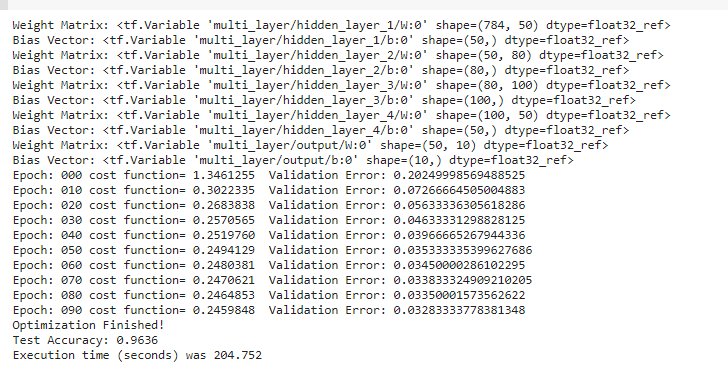

However, when we use the *RMSPropOptimizer*, if learning rate is 0.05, the testing error is very high. So I lower the learning rate to 0.005, the result turns to be good. 
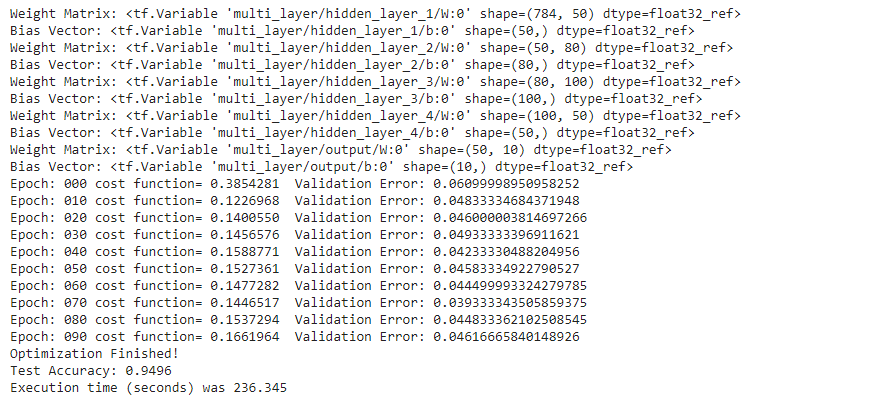

#### **(2)** 
1st layer:  tanh

2nd layer:  sigmoid

3rd layer:  sigmoid

4th layer:  reLu

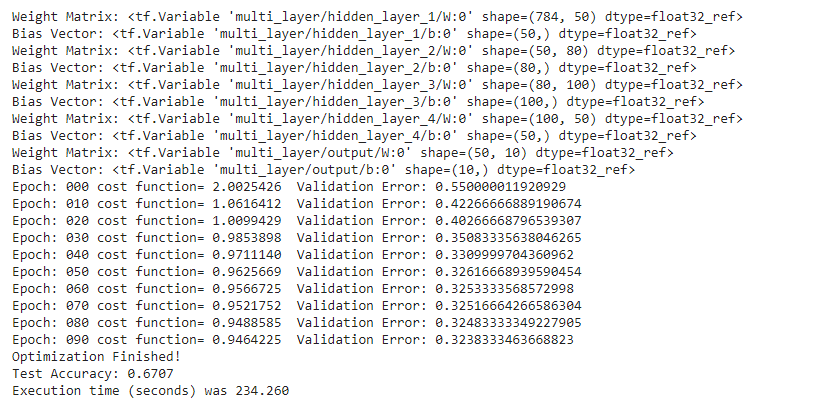

#### **(3)** 
3 layers all leaky reLU

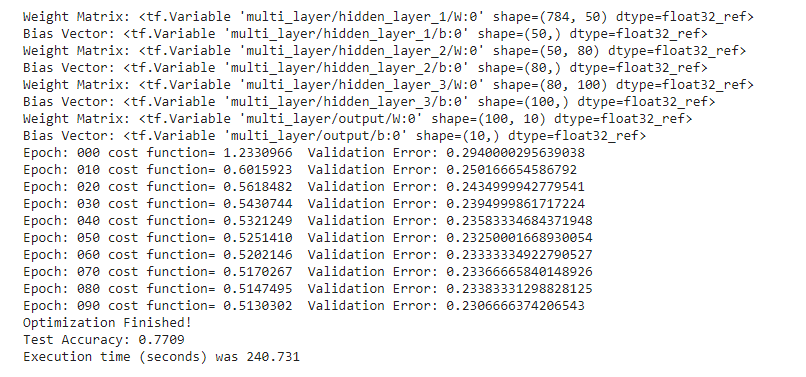

#### **(4)** 

3 layers all sigmoid

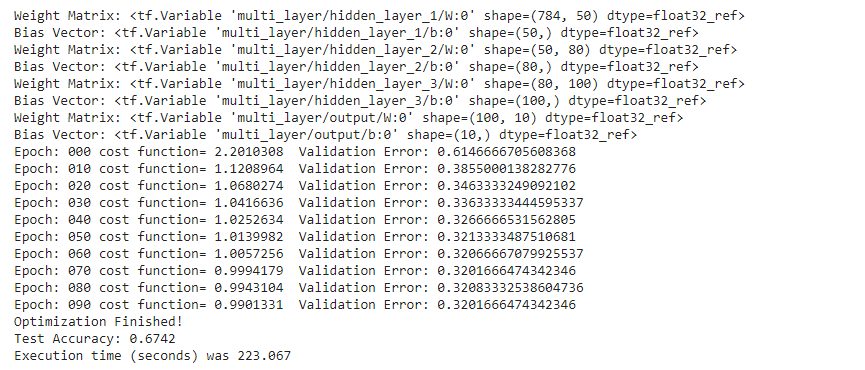

#### **(5)**  4 layers all leaky reLU

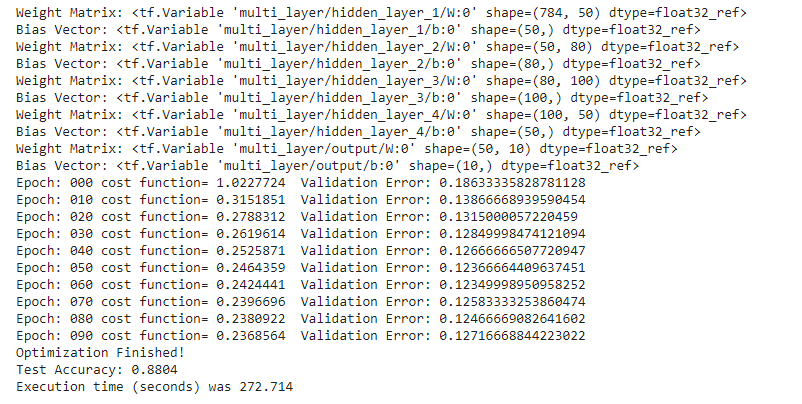

#### **(6)** 4 layers all tanh
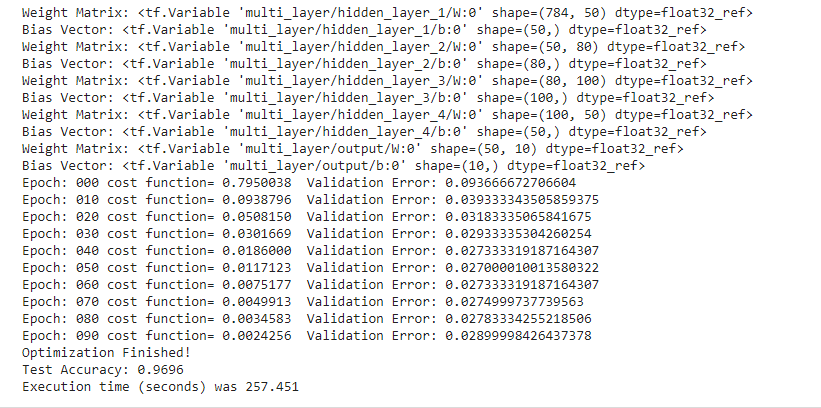


### **Problem 2**

I change the code in *logistic_regreesion_multi_layer.ipynb* to approach the problem. Firstly, I change the training data and testing data into cifar.

In [ ]:
#------------------------------------------------------------
#option 1: load MNIST dataset 
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("data/", one_hot=True)


#------------------------------------------------------------
#option 2: load CIFAR dataset 
print('\nLoading CIFAR')
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

x_train = np.reshape(x_train, [-1, img_size*img_size*3])
x_train = x_train.astype(np.float32)/255

x_test = np.reshape(x_test, [-1, img_size*img_size*3])
x_test = x_test.astype(np.float32)/255

to_categorical = tf.keras.utils.to_categorical 
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('\nSpliting data')

ind = np.random.permutation(x_train.shape[0])
x_train, y_train = x_train[ind], y_train[ind]

# 10% for validation 
validatationPct = 0.1
n = int(x_train.shape[0] * (1-validatationPct))
x_valid = x_train[n:]
x_train = x_train[:n]
#
y_valid = y_train[n:]
y_train = y_train[:n]

train_num_examples = x_train.shape[0]
valid_num_examples = x_valid.shape[0]
test_num_examples  = x_test.shape[0]

print(train_num_examples, valid_num_examples, test_num_examples)

I change the layer function into the following to let it perform different activation methods. Then we also need to change the parameter *n_hidden_layer* and the optimizer. We use *RMSPropOptimizer*

#### **(1)** 
1st layer:  tanh

2nd layer:  sigmoid

3rd layer:  leaky reLU

4th layer:  sigmoid

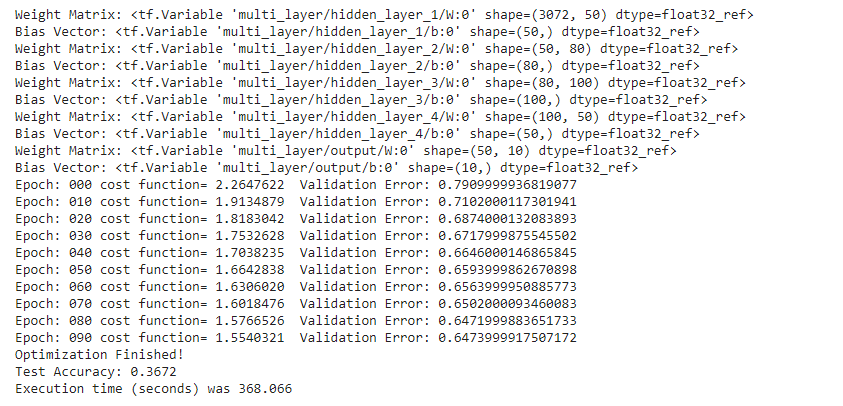

#### **(2)** 
1st layer:  tanh

2nd layer:  sigmoid

3rd layer:  sigmoid

4th layer:  reLu

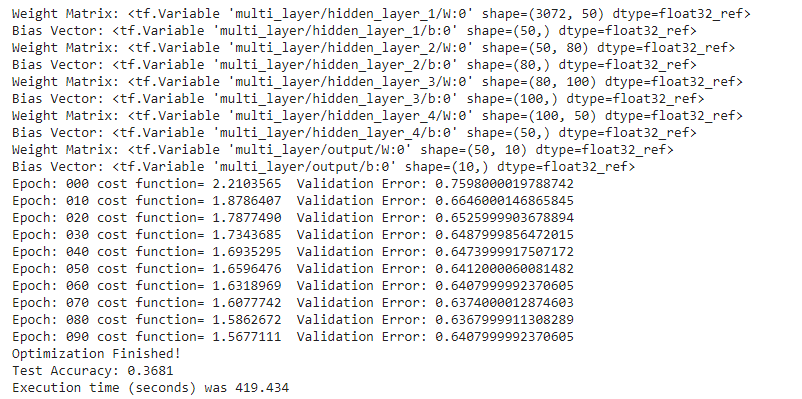

#### **(3)**

3 layers all leaky reLU

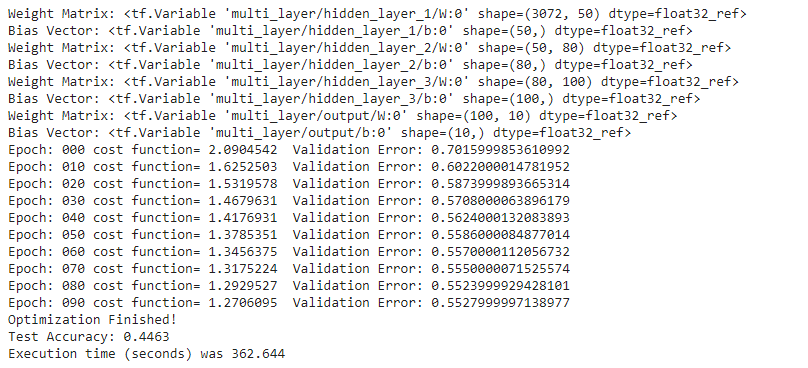

#### **(4)** 

3 layers all sigmoid

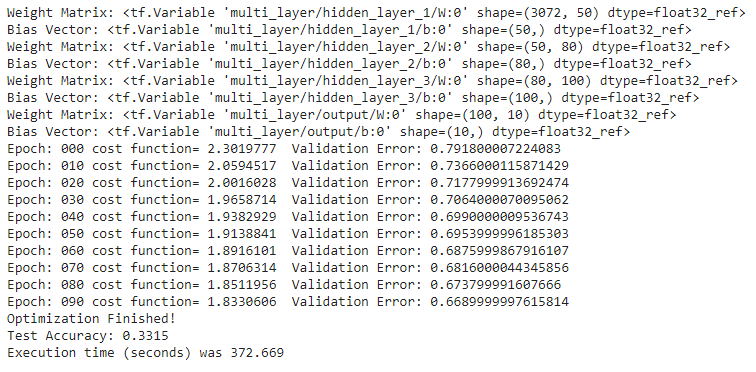

#### **(5)**  

4 layers all leaky reLU

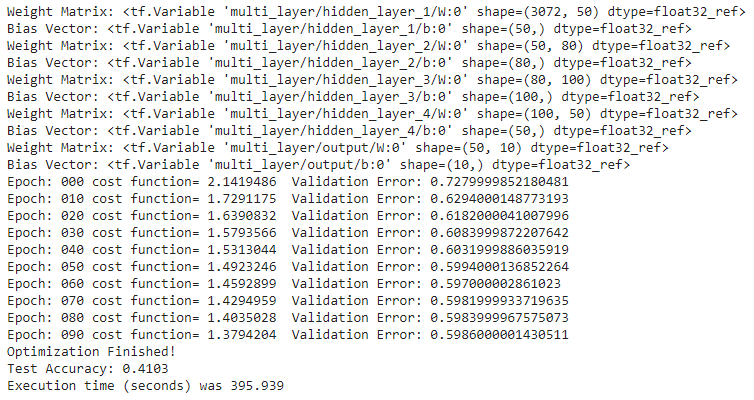

#### **(6)** 

4 layers all tanh

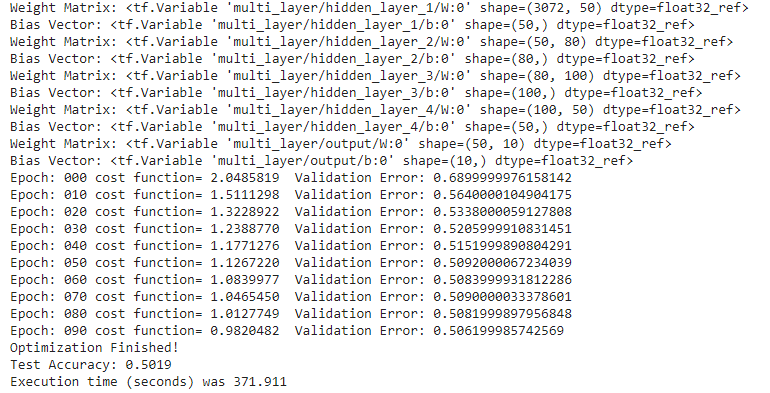

### **Problem 3**

We directly plot loss function. Professor Ali did not post the checkpoint file, so I use the logistic regression notebook and pyplot.


In [ ]:
if __name__ == '__main__':
    
    start_time = time.time()
    
    if not os.path.isdir('./logs/'):
        os.makedirs('./logs/')
    log_files_path = './logs/'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                
                #total_batch = int(mnist.train.num_examples/batch_size)
                total_batch = int((train_num_examples+batch_size-1) / batch_size)
            
                # Loop over all batches
                for i in range(total_batch):

                    #option 1
                    #minibatch_x, minibatch_y = mnist.train.next_batch(batch_size, shuffle=False)
                    
                    #option 2
                    start = i * batch_size
                    end = min(train_num_examples, start + batch_size)
                    minibatch_x = x_train[start:end]
                    minibatch_y = y_train[start:end]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #option 1
                    #accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    
                    #option 2
                    accuracy = sess.run(eval_op, feed_dict={x: x_valid, y: y_valid})
                    
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            
            #accuracy evaluated with the whole test dataset
            
            #option 1
            #accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            
            #option 2
            accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)

In [ ]:
plt.plot(loss_trace)
plt.title('Interplo-Problem2-6','ro-')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.show()

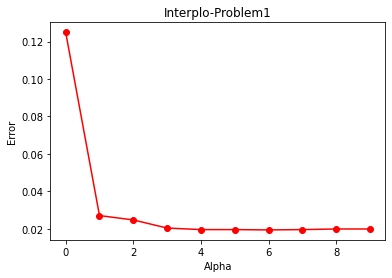